# Trabajo Final

### 1. Juan Pablo Arrázola
### 2. Horacio Molina
### 3. Jose Gutierrez
### 4. Paolo Brito

Ventas por estado:
State
Alabama                  6139.1200
Arizona                  6173.2570
Arkansas                 3016.4900
California              69740.7810
Colorado                 5797.2580
Connecticut              4393.5170
Delaware                14327.4700
District of Columbia       37.6800
Florida                 15231.0500
Georgia                  4286.2500
Idaho                     947.1820
Illinois                19987.6300
Indiana                  3422.0100
Iowa                     1316.5400
Kansas                    592.4200
Kentucky                11098.2000
Louisiana                2351.0100
Maine                     211.4400
Maryland                 3866.8520
Massachusetts            5392.4880
Michigan                14847.3020
Minnesota                6745.0600
Mississippi              2273.0300
Missouri                 2581.6600
Montana                   882.9840
Nebraska                 2348.2600
Nevada                   6594.8440
New Hampshire             633.

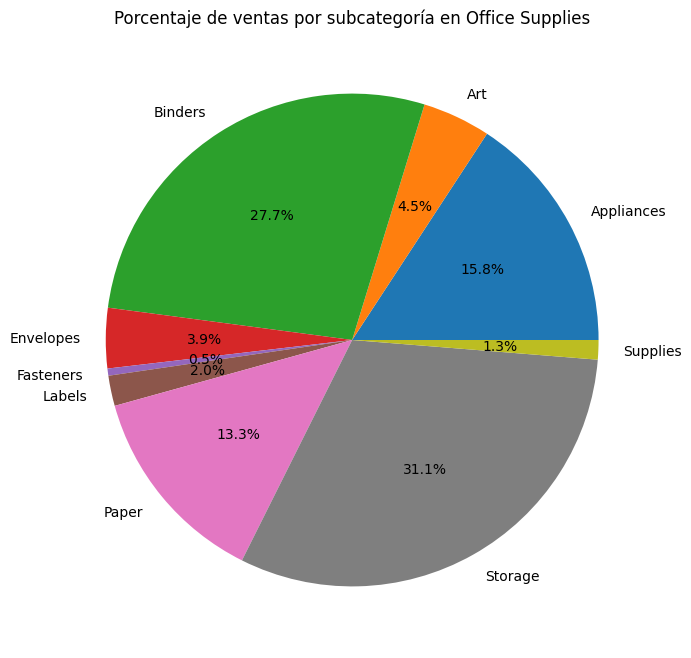

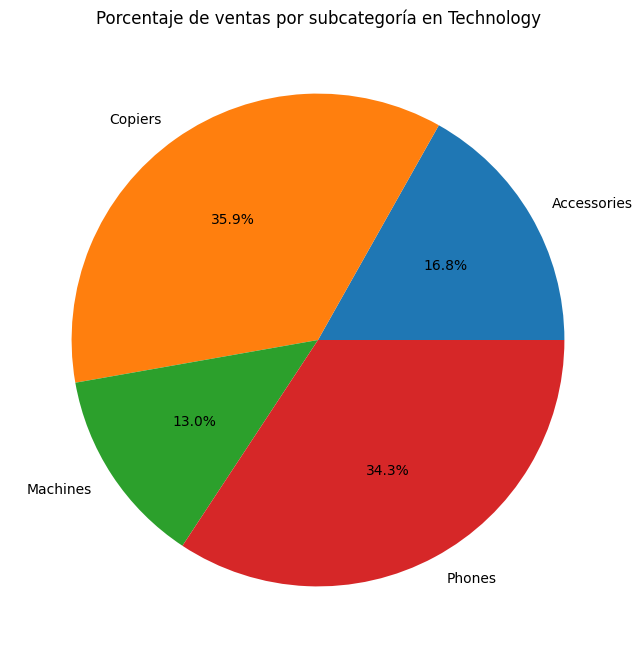

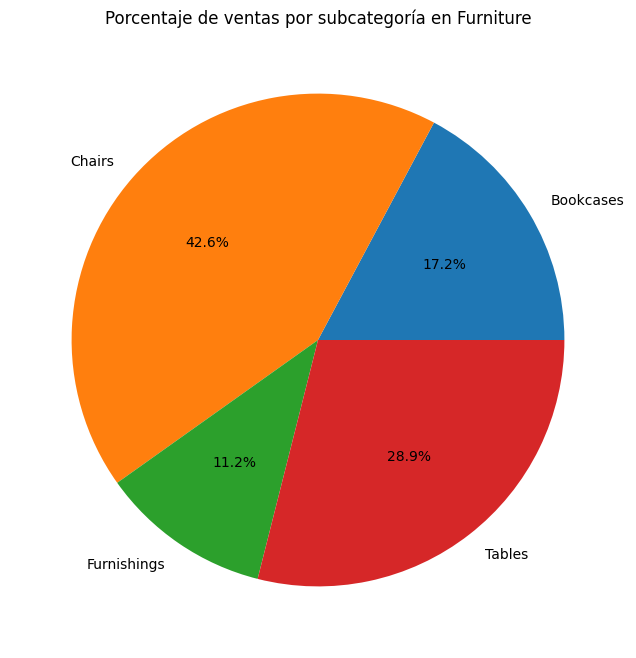

Intervalo de confianza al 90% para la media de ventas en California: (np.float64(152.62332707038942), np.float64(208.72786982080228))
Intervalo de confianza al 98% para la media de ventas en California: (np.float64(140.9307524707444), np.float64(220.4204444204473))
Estimación de ganancias para 500 ventas al 90% de confianza: (np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), np.float64(208.72786982080228), np.float64(152.62332707038942), 

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('RetailNuevo1.csv')

# 2. Expresa las ventas segmentadas por estado, por modo de entrega (Ship Mode) y por subcategoría.
sales_by_state = df.groupby('State')['Sales'].sum()
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum()
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()

print("Ventas por estado:")
print(sales_by_state)
print("\nVentas por modo de entrega:")
print(sales_by_ship_mode)
print("\nVentas por subcategoría:")
print(sales_by_subcategory)

# 3. Por cada categoría haga un diagrama de torta que exprese el porcentaje de ventas de cada subcategoría.
categories = df['Category'].unique()
for category in categories:
    category_data = df[df['Category'] == category]
    subcategory_sales = category_data.groupby('Sub-Category')['Sales'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(subcategory_sales, labels=subcategory_sales.index, autopct='%1.1f%%')
    plt.title(f'Porcentaje de ventas por subcategoría en {category}')
    plt.show()

# 4. Da un intervalo de confianza para la media de ventas de la tienda principal (la de mayor venta) al 90% y al 98% de confiabilidad.
main_store_sales = df.groupby('State')['Sales'].sum().idxmax()
main_store_data = df[df['State'] == main_store_sales]['Sales']

mean_sales = main_store_data.mean()
std_sales = main_store_data.std()
n = len(main_store_data)

confidence_90 = stats.t.interval(0.90, df=n-1, loc=mean_sales, scale=std_sales/np.sqrt(n))
confidence_98 = stats.t.interval(0.98, df=n-1, loc=mean_sales, scale=std_sales/np.sqrt(n))

print(f"Intervalo de confianza al 90% para la media de ventas en {main_store_sales}: {confidence_90}")
print(f"Intervalo de confianza al 98% para la media de ventas en {main_store_sales}: {confidence_98}")

# Estimación de ganancias para 500 ventas
estimated_sales_90 = 500 * confidence_90
estimated_sales_98 = 500 * confidence_98

print(f"Estimación de ganancias para 500 ventas al 90% de confianza: {estimated_sales_90}")
print(f"Estimación de ganancias para 500 ventas al 98% de confianza: {estimated_sales_98}")

# 5. Verifica si estadísticamente los siguientes estados tienen las mismas ventas.
states_to_compare = [('Washington', 'Arkansas'), ('Arkansas', 'Maryland'), ('Minnesota', 'Montana'), ('South Carolina', 'Connecticut')]

for state1, state2 in states_to_compare:
    sales_state1 = df[df['State'] == state1]['Sales']
    sales_state2 = df[df['State'] == state2]['Sales']
    t_stat, p_value = stats.ttest_ind(sales_state1, sales_state2)
    print(f"Comparación entre {state1} y {state2}: p-value = {p_value}")

# 6. Verifica si estadísticamente las siguientes subcategorías tienen las mismas ventas.
subcategories_to_compare = [('Accessories', 'Phones'), ('Art', 'Envelopes'), ('Paper', 'Storage')]

for subcat1, subcat2 in subcategories_to_compare:
    sales_subcat1 = df[df['Sub-Category'] == subcat1]['Sales']
    sales_subcat2 = df[df['Sub-Category'] == subcat2]['Sales']
    t_stat, p_value = stats.ttest_ind(sales_subcat1, sales_subcat2)
    print(f"Comparación entre {subcat1} y {subcat2}: p-value = {p_value}")

# 7. En función de lo observado hacer comparaciones adicionales que considere pertinentes.
# Aquí puedes agregar cualquier comparación adicional que consideres relevante basada en los datos.

# 8. Da recomendaciones en función de lo que analizó para poner mayor énfasis de marketing en las áreas donde tenemos mejores ventas.
# Basado en las ventas por estado y subcategoría, puedes hacer recomendaciones específicas.